# Data Exploration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from consts import (
    TRAIN_CALC_CSV,
    TRAIN_MASS_CSV,
    DICOM_INFO_CSV,
    META_CSV,
    TEST_CALC_CSV,
    TEST_MASS_CSV,
    IMAGE_DIR,
    CSV_DIR,
    DATA_DIR
)

## dicom_info

In [2]:
dicom_df: pd.DataFrame = pd.read_csv(DICOM_INFO_CSV)

In [3]:
dicom_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
dicom_df.shape

(10237, 38)

In [5]:
dicom_df.columns

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')

In [6]:
dicom_df.isna().sum()

file_path                                          0
image_path                                         0
AccessionNumber                                10237
BitsAllocated                                      0
BitsStored                                         0
BodyPartExamined                                   0
Columns                                            0
ContentDate                                        0
ContentTime                                        0
ConversionType                                     0
HighBit                                            0
InstanceNumber                                     0
LargestImagePixelValue                             0
Laterality                                       566
Modality                                           0
PatientBirthDate                               10237
PatientID                                          0
PatientName                                        0
PatientOrientation                            

In [7]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [8]:
dicom_df.dtypes

file_path                                       object
image_path                                      object
AccessionNumber                                float64
BitsAllocated                                    int64
BitsStored                                       int64
BodyPartExamined                                object
Columns                                          int64
ContentDate                                      int64
ContentTime                                    float64
ConversionType                                  object
HighBit                                          int64
InstanceNumber                                   int64
LargestImagePixelValue                           int64
Laterality                                      object
Modality                                        object
PatientBirthDate                               float64
PatientID                                       object
PatientName                                     object
PatientOri

In [9]:
dicom_df['SeriesDescription'].describe()

count               9671
unique                 3
top       cropped images
freq                3567
Name: SeriesDescription, dtype: object

In [10]:
unique_series = dicom_df["SeriesDescription"].unique()
print(unique_series)

['cropped images' 'full mammogram images' nan 'ROI mask images']


***SeriesDescription Column***

The `SeriesDescription` column in the `dicom_df` DataFrame provides a textual description of the image series. 
This column helps to categorize and identify the type of images in the dataset. 
Below are the unique values found in this column along with their descriptions:

- **cropped images**: These images are cropped versions of the original mammogram images, focusing on specific regions of interest.
- **full mammogram images**: These are the complete mammogram images without any cropping, showing the entire breast.
- **ROI mask images**: These images contain masks that highlight regions of interest (ROI) within the mammogram images. These masks are used for various analysis and diagnostic purposes.
- **NaN**: Some entries in this column are missing and are represented as NaN (Not a Number).

The `SeriesDescription` column is crucial for understanding the context and type of each image in the dataset, which can be useful for further analysis and processing.

In [39]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [12]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [13]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [20]:
def get_image_file_name(data, new_dict):
    """
    /kaggle
    /input
    /cbis-ddsm-breast-cancer-image-dataset
    /jpeg
    /1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304 [5]
    /1-172.jpg
    
    return path at index [5] after split depends on split('\')
    """
    for dicom in data:
        key = dicom.split('/')[-2]
#         print(key)
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [40]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [41]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [42]:
correct_dir = "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg"
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0])


Cropped Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


In [45]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
print('\nFull mammo Images paths:')
print(full_mammogram.iloc[0])


Full mammo Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


In [46]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
print('\nROI Mask Images paths:')
print(roi_mask.iloc[0])


ROI Mask Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [48]:
def plot_samples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

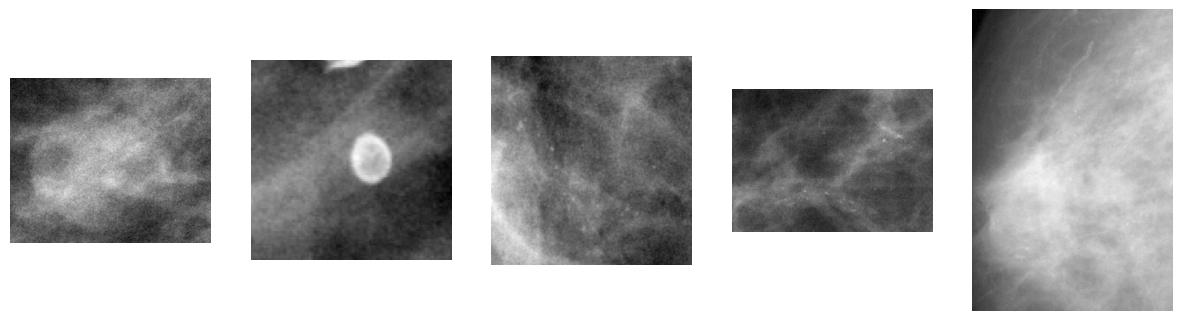

In [49]:
plot_samples(cropped_images, 15, 15)

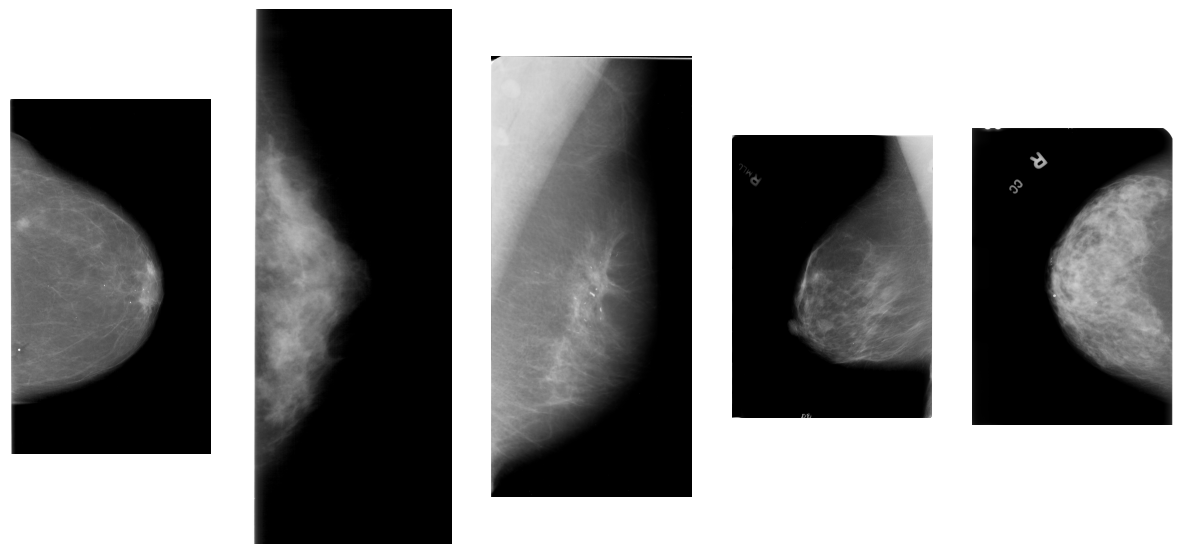

In [50]:
plot_samples(full_mammogram, 15, 15)

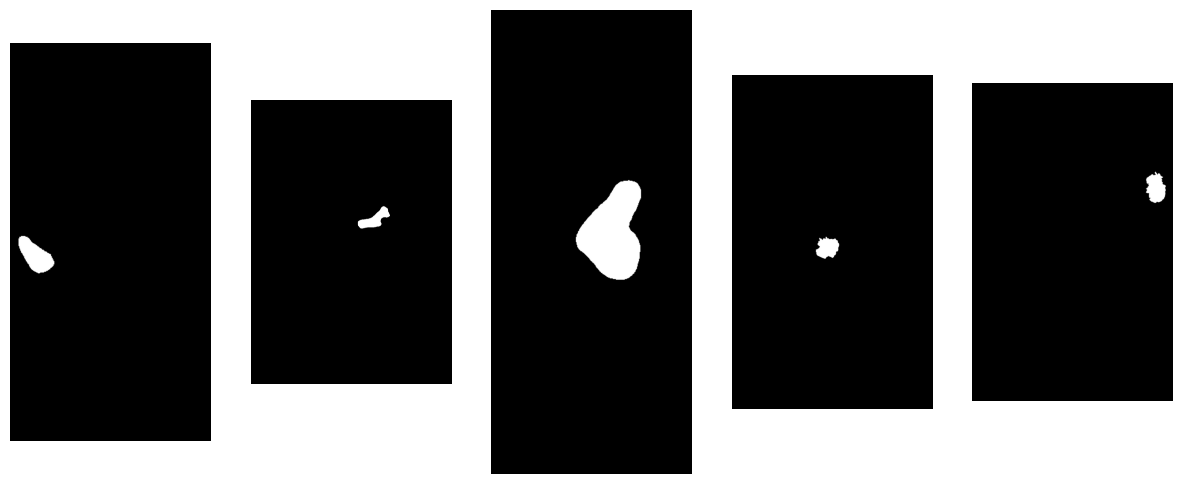

In [51]:
plot_samples(roi_mask, 15, 15)

****DICOM DataFrame Overview****

The `dicom_df` DataFrame contains metadata information about DICOM images in the dataset. It has 10,237 rows and 38 columns. Below is a brief description of some key columns:

- **file_path**: Path to the DICOM file.
- **image_path**: Path to the corresponding image file.
- **AccessionNumber**: Accession number (not available in this dataset).
- **BitsAllocated**: Number of bits allocated for each pixel sample.
- **BitsStored**: Number of bits stored for each pixel sample.
- **BodyPartExamined**: The body part examined (e.g., BREAST).
- **Columns**: Number of columns in the image.
- **ContentDate**: The date the image was created.
- **ContentTime**: The time the image was created.
- **ConversionType**: Type of conversion applied to the image.
- **HighBit**: Highest bit set in the image pixel data.
- **InstanceNumber**: Instance number of the image.
- **LargestImagePixelValue**: Largest pixel value in the image.
- **Laterality**: Laterality of the body part (e.g., R for right, L for left).
- **Modality**: Type of imaging modality (e.g., MG for mammography).
- **PatientID**: Unique identifier for the patient.
- **PatientName**: Name of the patient.
- **PatientOrientation**: Orientation of the patient during the imaging.
- **PhotometricInterpretation**: Photometric interpretation of the image (e.g., MONOCHROME2).
- **PixelRepresentation**: Pixel representation (e.g., 0 for unsigned integer).
- **Rows**: Number of rows in the image.
- **SOPClassUID**: Unique identifier for the SOP class.
- **SOPInstanceUID**: Unique identifier for the SOP instance.
- **SamplesPerPixel**: Number of samples per pixel.
- **SecondaryCaptureDeviceManufacturer**: Manufacturer of the secondary capture device.
- **SecondaryCaptureDeviceManufacturerModelName**: Model name of the secondary capture device.
- **SeriesDescription**: Description of the image series.
- **SeriesInstanceUID**: Unique identifier for the series instance.
- **SeriesNumber**: Number of the series.
- **SmallestImagePixelValue**: Smallest pixel value in the image.
- **SpecificCharacterSet**: Character set used in the dataset.
- **StudyDate**: Date of the study.
- **StudyID**: Unique identifier for the study.
- **StudyInstanceUID**: Unique identifier for the study instance.
- **StudyTime**: Time of the study.

Note: Some columns have missing values, such as `AccessionNumber`, `PatientBirthDate`, `PatientSex`, and `ReferringPhysicianName`.

In [82]:
mass_train = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")

In [83]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [84]:
mass_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [85]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})

In [86]:
mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [87]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [88]:
print(f'Shape of mass_train: {mass_train.shape}')

Shape of mass_train: (1318, 14)


In [89]:
calc_train = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv")

In [90]:
calc_train.head()


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [91]:
import pandas as pd

class ImagePathFixer:
    def __init__(self, full_mammogram, cropped_images, roi_mask, correct_dir, old_base="CBIS-DDSM/jpeg"):
        """
        Initialize the fixer with image path collections and a correct base directory.
        
        :param full_mammogram: List or Series of full mammogram image paths.
        :param cropped_images: List or Series of cropped image paths.
        :param roi_mask: List or Series of ROI mask image paths.
        :param correct_dir: The correct directory to use (e.g., "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg").
        :param old_base: The old base directory string to be replaced.
        """
        self.correct_dir = correct_dir
        self.old_base = old_base
        
        # Replace the old base in all provided paths.
        self.full_mammogram = self.replace_path(full_mammogram, old_base, correct_dir)
        self.cropped_images = self.replace_path(cropped_images, old_base, correct_dir)
        self.roi_mask = self.replace_path(roi_mask, old_base, correct_dir)
        
        # Create lookup dictionaries from image file names.
        self.full_mammo_dict = self.get_image_file_name(self.full_mammogram)
        self.cropped_images_dict = self.get_image_file_name(self.cropped_images)
        self.roi_img_dict = self.get_image_file_name(self.roi_mask)

    def replace_path(self, sample, old_path, new_path):
        """
        Replace occurrences of the old path with the new path.
        Accepts either a list of strings or a Pandas Series.
        """
        if isinstance(sample, list):
            return [s.replace(old_path, new_path) for s in sample]
        elif isinstance(sample, pd.Series):
            return sample.str.replace(old_path, new_path, regex=True)
        else:
            raise ValueError("Unsupported type for sample; expected list or Pandas Series.")

    def get_image_file_name(self, data):
        """
        Build a dictionary mapping a key (derived from the image path) to the full path.
        The key is assumed to be the second-to-last element in the path.
        """
        new_dict = {}
        for path in data:
            parts = path.split('/')
            if len(parts) >= 2:
                key = parts[-2]  # Adjust key extraction if necessary.
                new_dict[key] = path
        print(f"Dictionary created with {len(new_dict.keys())} keys.")
        return new_dict

    def fix_image_path(self, df):
        """
        Update the image paths in the DataFrame using the lookup dictionaries.
        Assumptions:
          - Column index 11 uses full_mammo_dict.
          - Column index 12 uses cropped_images_dict.
          - Column index 13 uses roi_img_dict.
          
        :param df: The Pandas DataFrame (e.g., your training dataset) to update.
        :return: The updated DataFrame.
        """
        for indx, row in df.iterrows():
            # Process column 11 (full mammogram image paths)
            try:
                path_11 = row[11]
                if pd.isna(path_11):
                    continue
                parts = path_11.split('/')
                if len(parts) > 2:
                    key = parts[2]  # Adjust the index if your key position changes.
                    if key in self.full_mammo_dict:
                        df.at[indx, 11] = self.full_mammo_dict[key]
                    else:
                        df.at[indx, 11] = None
                        print(f"KeyError: '{key}' not found in full_mammo_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 11: {e}")
            
            # Process column 12 (cropped image paths)
            try:
                path_12 = row[12]
                if pd.isna(path_12):
                    continue
                parts = path_12.split('/')
                if len(parts) > 2:
                    key = parts[2]
                    if key in self.cropped_images_dict:
                        df.at[indx, 12] = self.cropped_images_dict[key]
                    else:
                        df.at[indx, 12] = None  # Corrected: update column 12.
                        print(f"KeyError: '{key}' not found in cropped_images_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 12: {e}")
            
            # Process column 13 (ROI mask image paths)
            try:
                path_13 = row[13]
                if pd.isna(path_13):
                    continue
                parts = path_13.split('/')
                if len(parts) > 2:
                    key = parts[2]
                    if key in self.roi_img_dict:
                        df.at[indx, 13] = self.roi_img_dict[key]
                    else:
                        df.at[indx, 13] = None
                        print(f"KeyError: '{key}' not found in roi_img_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 13: {e}")
        return df

# Example usage:
# Assuming you have your lists/series: full_mammogram, cropped_images, roi_mask,
# and a Pandas DataFrame 'train_df' containing your train dataset.
#
correct_dir = "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg"
fixer = ImagePathFixer(full_mammogram, cropped_images, roi_mask, correct_dir)


Dictionary created with 2857 keys.
Dictionary created with 3567 keys.
Dictionary created with 3247 keys.


In [92]:
mass_train = fixer.fix_image_path(mass_train)
mass_train.head()

/tmp/ipykernel_126603/3514247239.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path_11 = row[11]
/tmp/ipykernel_126603/3514247239.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path_12 = row[12]
/tmp/ipykernel_126603/3514247239.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path_13 = row[13]
/tmp/ipykernel_126603/3514247239.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fut

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,11,12,13
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...


In [93]:
print(f'Shape of mass_train: {mass_train.shape}')


Shape of mass_train: (1318, 17)
